In [31]:
# aggregate structure modeling ------------------------

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score
from cairosvg import svg2pdf 

In [33]:
## 1. Figure_2c --------------------

In [34]:
### 1_1. heatmap ---

In [35]:
def plot_subclusters(transcript,title):

    dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'      
    pred = pd.read_csv(dir+'X_pred_'+transcript+'_1000_0.5_0.txt', sep='\t') 

    ### prepare the data 

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    flt = pred[pred['group'] == 'X_pred_WT_inWT']
    X_pred_WT_inWT = flt.drop(columns=['iid','group'])

    flt = pred[pred['group'] == 'X_pred_WT_inMT']
    X_pred_WT_inMT = flt.drop(columns=['iid','group'])

    flt = pred[pred['group'] == 'X_pred_MT_inWT']
    X_pred_MT_inWT = flt.drop(columns=['iid','group'])

    flt = pred[pred['group'] == 'X_pred_MT_inMT']
    X_pred_MT_inMT = flt.drop(columns=['iid','group'])

    
    # 1. Cluster0_Nolig 

    fig, ax = plt.subplots(2, 1, figsize=(13, 6), 
                                gridspec_kw={
                            'height_ratios': [1, 3],
                            'hspace': 0.05
                            },
                        sharex=True, sharey=False)


    ax[0].plot(range(X_pred_WT_inWT.shape[1]), X_pred_WT_inWT.sum(axis=0)/X_pred_WT_inWT.shape[0], color = colors[0], linewidth=2)
    ax[0].set_title('Cluster 0_Noligand (n=' + str(X_pred_WT_inWT.shape[0])+')', fontsize=16)
    ax[0].set_ylabel('Mod rate',fontsize=14)
    ax[0].set_ylim(0,0.2)

    flt = pred[pred['group'] == 'X_pred_WT_inWT']
    dplot = flt.drop(columns=['iid','group'])
    cmap = sns.cm.rocket_r
    sns.heatmap(dplot,cmap = cmap,ax=ax[1],cbar=False)
    ax[1].set_ylabel('read index',fontsize=14)
    ax[1].set_title('')
    fig.suptitle(title, fontsize=20)
    
    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
    plt.savefig(dir_out+'Fig2c_heatmap_Cluster0_Nolig.pdf',bbox_inches='tight',dpi=300)

    # 2. Cluster0_Lig

    fig, ax = plt.subplots(2, 1, figsize=(13, 6), 
                                gridspec_kw={
                            'height_ratios': [1, 3],
                            'hspace': 0.05
                            },
                        sharex=True, sharey=False)


    ax[0].plot(range(X_pred_WT_inMT.shape[1]), X_pred_WT_inMT.sum(axis=0)/X_pred_WT_inMT.shape[0], color = colors[1], linewidth=2, linestyle='dotted')
    ax[0].set_title('Cluster 0_Ligand (n=' + str(X_pred_WT_inMT.shape[0])+')', fontsize=16)
    ax[0].set_ylabel('Mod rate',fontsize=14)
    ax[0].set_ylim(0,0.2)

    flt = pred[pred['group'] == 'X_pred_WT_inMT']
    dplot = flt.drop(columns=['iid','group'])
    cmap = sns.cm.rocket_r
    sns.heatmap(dplot,cmap = cmap,ax=ax[1],cbar=False)
    ax[1].set_ylabel('read index',fontsize=14)
    ax[1].set_title('')

    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
    plt.savefig(dir_out+'Fig2c_heatmap_Cluster0_Lig.pdf',bbox_inches='tight',dpi=300)


    # 3. Cluster1_Nolig
    fig, ax = plt.subplots(2, 1, figsize=(13, 6), 
                                gridspec_kw={
                            'height_ratios': [1, 3],
                            'hspace': 0.05
                            },
                        sharex=True, sharey=False)


    ax[0].plot(range(X_pred_MT_inWT.shape[1]), X_pred_MT_inWT.sum(axis=0)/X_pred_MT_inWT.shape[0], color = colors[0], linewidth=2, linestyle='dotted')
    ax[0].set_title('Cluster 1_Noligand (n=' + str(X_pred_MT_inWT.shape[0])+')', fontsize=16)
    ax[0].set_ylabel('Mod rate',fontsize=14)
    ax[0].set_ylim(0,0.2)

    flt = pred[pred['group'] == 'X_pred_MT_inWT']
    dplot = flt.drop(columns=['iid','group'])
    cmap = sns.cm.rocket_r
    sns.heatmap(dplot,cmap = cmap,ax=ax[1],cbar=False)
    ax[1].set_ylabel('read index',fontsize=14)
    ax[1].set_title('')
    
    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
    plt.savefig(dir_out+'Fig2c_heatmap_Cluster1_Nolig.pdf',bbox_inches='tight',dpi=300)


    # 4. Cluster1_Lig
    fig, ax = plt.subplots(2, 1, figsize=(13, 6), 
                                gridspec_kw={
                            'height_ratios': [1, 3],
                            'hspace': 0.05
                            },
                        sharex=True, sharey=False)

    ax[0].plot(range(X_pred_MT_inMT.shape[1]), X_pred_MT_inMT.sum(axis=0)/X_pred_MT_inMT.shape[0], color = colors[1], linewidth=2)
    ax[0].set_title('Cluster 1_Ligand (n=' + str(X_pred_MT_inMT.shape[0])+')', fontsize=16)
    ax[0].set_ylabel('Mod rate',fontsize=14)
    ax[0].set_ylim(0,0.2)

    flt = pred[pred['group'] == 'X_pred_MT_inMT']
    dplot = flt.drop(columns=['iid','group'])
    cmap = sns.cm.rocket_r
    sns.heatmap(dplot,cmap = cmap,ax=ax[1],cbar=False)
    ax[1].set_ylabel('read index',fontsize=14)
    ax[1].set_title('')
   
    dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
    plt.savefig(dir_out+'Fig2c_heatmap_Cluster1_Lig.pdf',bbox_inches='tight',dpi=300)

    fig.show() 


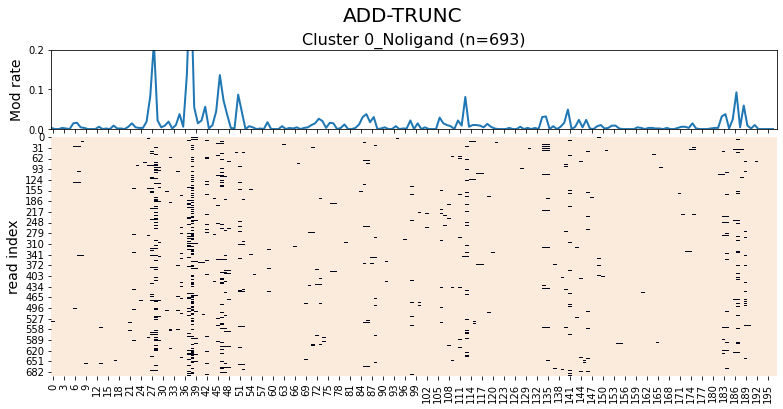

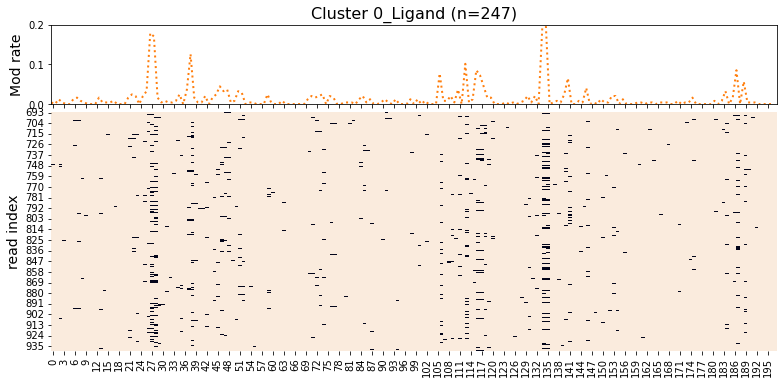

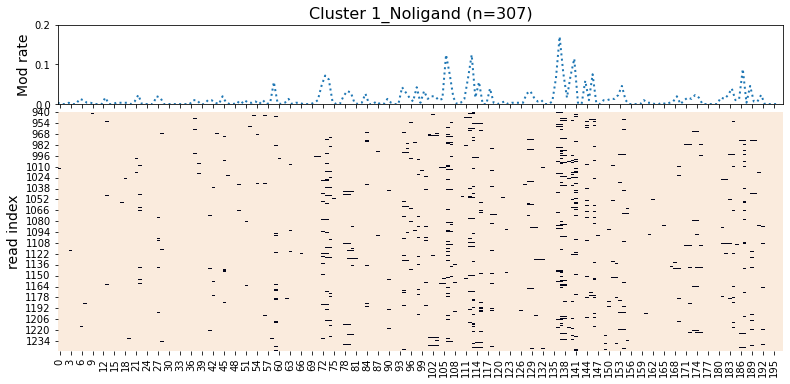

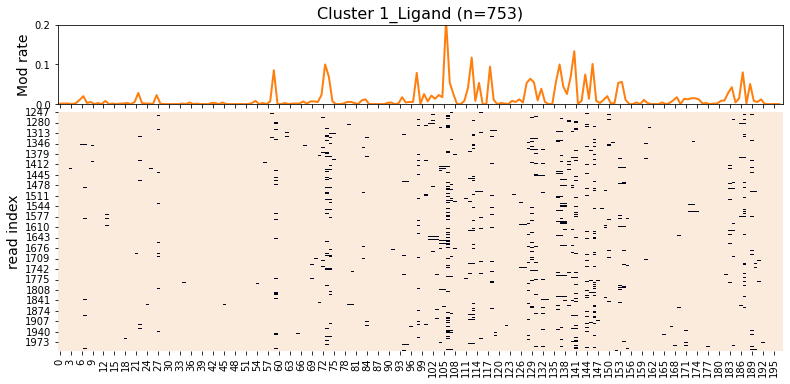

In [36]:
plot_subclusters("ADD-TRUNC","ADD-TRUNC")

In [37]:
### 1_2. AUROC --- ---  

In [130]:
## backup not touch   20241104 update
seq_add = "GCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUCUGUCGCUUUAUCCGAAAUUUUAUAAAGAGAAGACUCAUGAAU"
ss_apoB = "(((((.......((.........))....)))))......((((((.......))))))...((((.((((....((((((..........))))))...))))))))...."
ss_apoA = "..((((.....(((((((.......)))))))........((((((.......))))))....))))((((.((.((((((..........)))))).))))))........"
ss_holo = ".(((((((...(((((((.......)))))))........((((((.......))))))..))))))).......((((((..........))))))..............."
print(len(ss_holo))
print(len(ss_apoA))
print(len(ss_apoB))


def calc_AUC(dot, shape_list):
    """
    dot                 -- Dotbracket structure
    shape_list          -- A list of SHAPE scores
    
    Calculate the AUC between structure and shape
    
    Return [point1, point2, point3,...]
    """
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    import numpy as np
    
    dot_array = np.array(list(dot))
    shape_array = np.array(shape_list, dtype=str)
    
    dot_array = dot_array[shape_array!='NULL']
    shape_array = shape_array[shape_array!='NULL']
    shape_array = shape_array.astype(float)
    
    unpaired = (dot_array=='.')
    
    FPR, TPR, _ = roc_curve(unpaired, shape_array)
    auc_1 = auc(FPR, TPR)
    auc_2 = roc_auc_score(unpaired, shape_array)
    print(auc_1, auc_2)
    
    return auc_1

112
112
112


In [131]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
df = pd.read_csv(dir + 'all_subcluster_pca_mod_rate_allinfo.csv', sep=',')
df[['subcluster','read']] = df['id'].str.split(':',expand=True)
flt = df
allpop = flt

bitall = pd.read_csv(dir+'bitall_subclusters_mod_rate_allinfo.txt',header=None,sep='\t')
bitall.columns = ['bit','subcluster','read','id']
allpopread = pd.merge(allpop,bitall, how='left', on=['id','id'])

### cluster0_Nolig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster0_Nolig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster0_Nolig = list(modrate_pred.mod_rate/norm_factor)


### cluster0_Lig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster0_Lig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster0_Lig = list(modrate_pred.mod_rate/norm_factor)


### cluster1_Nolig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster1_Nolig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster1_Nolig = list(modrate_pred.mod_rate/norm_factor)


### cluster1_Lig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster1_Lig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster1_Lig = list(modrate_pred.mod_rate/norm_factor)

In [132]:
def get_subclusters_AUROC(input_mod,subcluster):

    ### A. apoB

    seq = 'GCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUCUGUCGCUUUAUCCGAAAUUUUAUAAAGAGAAGACUCAUGAAU'
    dot = "(((((.......((.........))....)))))......((((((.......))))))...((((.((((....((((((..........))))))...))))))))...."   ### apoB
    seq = list(seq)
    dot = list(dot)
    mod = list(input_mod)
    print(len(mod))
    assert len(seq) == len(dot) == len(mod)


    filter_str = ""
    base_shape = []
    i = 1
    temp_out = []
    for base, base_str,shape in zip(seq, dot, mod):
        if shape!='NULL':
            filter_str += base_str
            base_shape.append(float(shape))
            temp_out.append([i, base, base_str, shape])
        else:
            temp_out.append([i, base, base_str,shape])
        i += 1
    N = len(filter_str)
    print (N)
    auc = calc_AUC(filter_str, base_shape)
    print( "auc:", auc )
    print( calc_AUC("."+filter_str[:-1], base_shape) )
    print( calc_AUC(filter_str[1:]+".",  base_shape) )


    y_true = (np.array(list(filter_str))==".").tolist()
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=base_shape)
    fig = plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr,'-', label=f"AUC={auc:.3} \n N={N}",color = 'steelblue', linewidth = 3.0)
    plt.plot([0,1],[0,1],color = 'lightgrey', linewidth = 3.0, linestyle = 'dashed')
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(loc='lower right',fontsize = 14)
    plt.title(subcluster+' against apoB', fontsize = 16)

    dir_out = '/home/han/proj_het_AC/rerun_analysis/3_ribosxitch_BMM_cluster/Manuscript_Fig3/1_BMM_cluster/figures/'
    plt.savefig(dir_out+'Fig2c_AUROC_'+subcluster+'_against_apoB.pdf',bbox_inches='tight', dpi=300) 
    plt.show()


    ### B. apoA 
    seq = 'GCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUCUGUCGCUUUAUCCGAAAUUUUAUAAAGAGAAGACUCAUGAAU'
    dot = "..((((.....(((((((.......)))))))........((((((.......))))))....))))((((.((.((((((..........)))))).))))))........"   ### apoA
    seq = list(seq)
    dot = list(dot)
    mod = list(input_mod)
    print(len(mod))
    assert len(seq) == len(dot) == len(mod)


    filter_str = ""
    base_shape = []
    i = 1
    temp_out = []
    for base, base_str,shape in zip(seq, dot, mod):
        if shape!='NULL':
            filter_str += base_str
            base_shape.append(float(shape))
            temp_out.append([i, base, base_str, shape])
        else:
            temp_out.append([i, base, base_str,shape])
        i += 1
    N = len(filter_str)
    print (N)
    auc = calc_AUC(filter_str, base_shape)
    print( "auc:", auc )
    print( calc_AUC("."+filter_str[:-1], base_shape) )
    print( calc_AUC(filter_str[1:]+".",  base_shape) )


    y_true = (np.array(list(filter_str))==".").tolist()
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=base_shape)
    fig = plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr,'-', label=f"AUC={auc:.3} \n N={N}",color = 'steelblue', linewidth = 3.0)
    plt.plot([0,1],[0,1],color = 'lightgrey', linewidth = 3.0, linestyle = 'dashed')
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(loc='lower right',fontsize = 14)
    plt.title(subcluster+' against apoA', fontsize = 16)

    dir_out = '/home/han/proj_het_AC/rerun_analysis/3_ribosxitch_BMM_cluster/Manuscript_Fig3/1_BMM_cluster/figures/'
    plt.savefig(dir_out+'Fig2c_AUROC_'+subcluster+'_against_apoA.pdf',bbox_inches='tight', dpi=300) 
    plt.show()


    ### C. holo


    seq = 'GCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUCUGUCGCUUUAUCCGAAAUUUUAUAAAGAGAAGACUCAUGAAU'
    dot = ".(((((((...(((((((.......)))))))........((((((.......))))))..))))))).......((((((..........))))))..............."   ### holo  
    seq = list(seq)
    dot = list(dot)
    mod = list(input_mod)
    print(len(mod))
    assert len(seq) == len(dot) == len(mod)
    

    filter_str = ""
    base_shape = []
    i = 1
    temp_out = []
    for base, base_str,shape in zip(seq, dot,mod):
        if shape!='NULL':
            filter_str += base_str
            base_shape.append(float(shape))
            temp_out.append([i, base, base_str, shape])
        else:
            temp_out.append([i, base, base_str,shape])
        i += 1
    N = len(filter_str)
    print (N)
    auc = calc_AUC(filter_str, base_shape)
    print( "auc:", auc )
    print( calc_AUC("."+filter_str[:-1], base_shape) )
    print( calc_AUC(filter_str[1:]+".",  base_shape) )

    y_true = (np.array(list(filter_str))==".").tolist()
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=base_shape)
    fig = plt.figure(figsize = (6,6))
    plt.plot(fpr, tpr,'-', label=f"AUC={auc:.3} \n N={N}",color = 'steelblue', linewidth = 3.0)
    plt.plot([0,1],[0,1],color = 'lightgrey', linewidth = 3.0, linestyle = 'dashed')
    plt.ylabel('True Positive Rate', fontsize = 16)
    plt.xlabel('False Positive Rate', fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(loc='lower right',fontsize = 14)
    plt.title(subcluster+' against holo', fontsize = 16)

    dir_out = '/home/han/proj_het_AC/rerun_analysis/3_ribosxitch_BMM_cluster/Manuscript_Fig3/1_BMM_cluster/figures/'
    plt.savefig(dir_out+'Fig2c_AUROC_'+subcluster+'_against_holo.pdf',bbox_inches='tight', dpi=300) 
    plt.show()

112
112
0.6202107279693487 0.6202107279693487
auc: 0.6202107279693487
0.561941251596424 0.561941251596424
0.561941251596424
0.6624560281419891 0.6624560281419891
0.6624560281419891


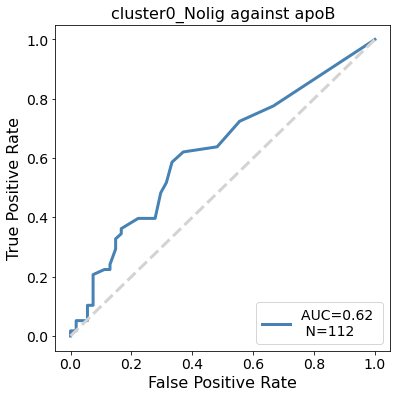

112
112
0.6111111111111112 0.6111111111111112
auc: 0.6111111111111112
0.6146232439335888 0.6146232439335888
0.6146232439335888
0.6082375478927202 0.6082375478927202
0.6082375478927202


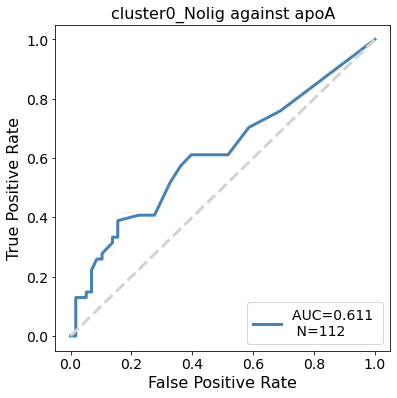

112
112
0.5192307692307693 0.5192307692307693
auc: 0.5192307692307693
0.5424679487179488 0.5424679487179488
0.5424679487179488
0.4934294871794872 0.4934294871794872
0.4934294871794872


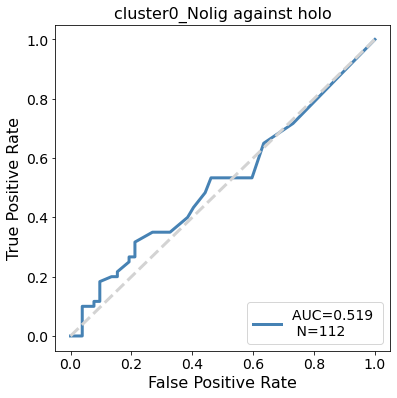

112
112
0.5371966794380587 0.5371966794380587
auc: 0.5371966794380587
0.5223499361430396 0.5223499361430396
0.5223499361430396
0.5943396226415094 0.5943396226415094
0.5943396226415094


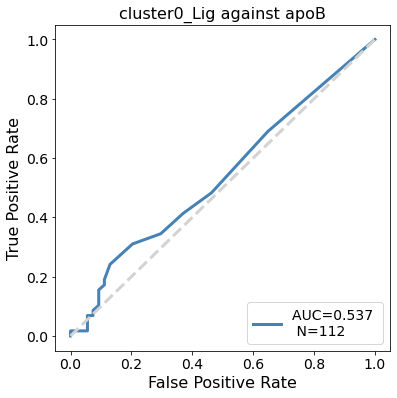

112
112
0.6176564495530013 0.6176564495530013
auc: 0.6176564495530013
0.6114303959131546 0.6114303959131546
0.6114303959131546
0.6079182630906769 0.6079182630906769
0.6079182630906769


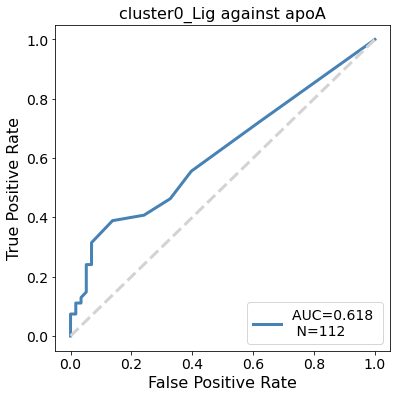

112
112
0.5657051282051282 0.5657051282051282
auc: 0.5657051282051282
0.5714743589743589 0.5714743589743589
0.5714743589743589
0.548076923076923 0.548076923076923
0.548076923076923


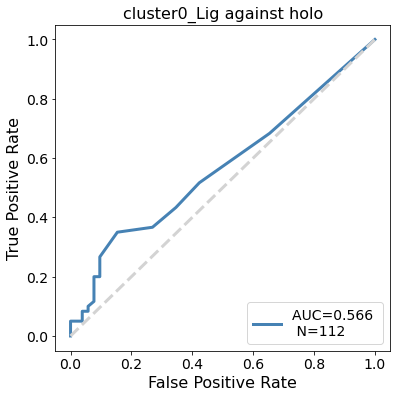

112
112
0.4936143039591316 0.4936143039591316
auc: 0.4936143039591316
0.515006385696041 0.515006385696041
0.515006385696041
0.48353054045410937 0.48353054045410937
0.48353054045410937


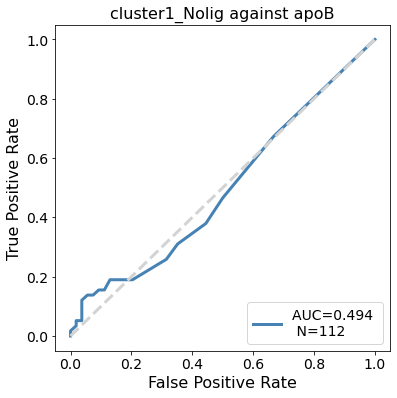

112
112
0.5231481481481481 0.5231481481481481
auc: 0.5231481481481481
0.4924968071519795 0.4924968071519795
0.4924968071519795
0.5046296296296297 0.5046296296296297
0.5046296296296297


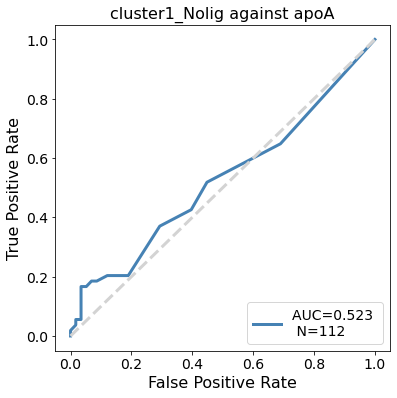

112
112
0.6192307692307693 0.6192307692307693
auc: 0.6192307692307693
0.60625 0.60625
0.60625
0.5868589743589744 0.5868589743589744
0.5868589743589744


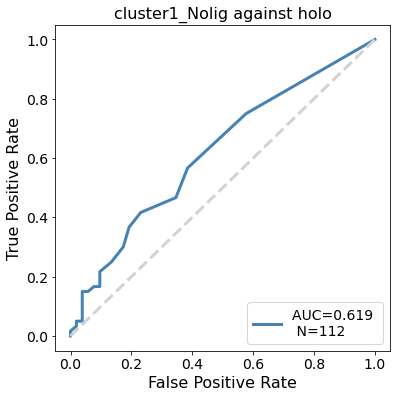

112
112
0.41554916985951473 0.41554916985951473
auc: 0.41554916985951473
0.46008939974457214 0.46008939974457214
0.46008939974457214
0.39031020147105855 0.39031020147105855
0.39031020147105855


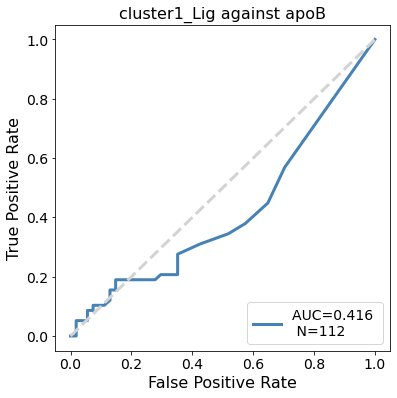

112
112
0.45067049808429116 0.45067049808429116
auc: 0.45067049808429116
0.3919220945083014 0.3919220945083014
0.3919220945083014
0.48611111111111116 0.48611111111111116
0.48611111111111116


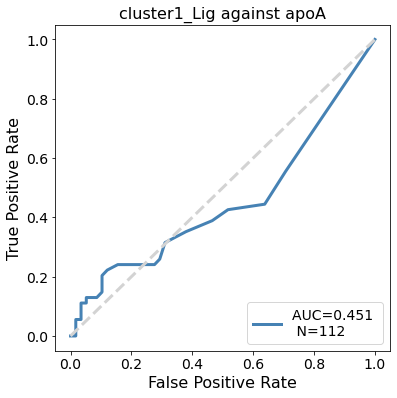

112
112
0.5591346153846154 0.5591346153846154
auc: 0.5591346153846154
0.5331730769230769 0.5331730769230769
0.5331730769230769
0.5915064102564103 0.5915064102564103
0.5915064102564103


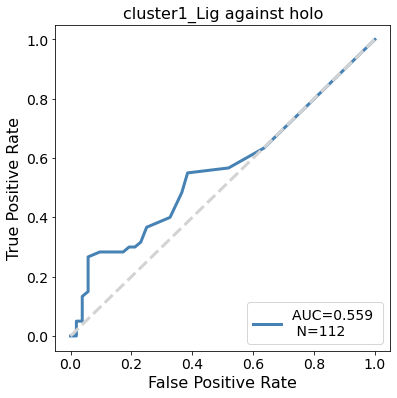

In [133]:
get_subclusters_AUROC(modrate_pred_cluster0_Nolig,"cluster0_Nolig")
get_subclusters_AUROC(modrate_pred_cluster0_Lig,"cluster0_Lig")
get_subclusters_AUROC(modrate_pred_cluster1_Nolig,"cluster1_Nolig")
get_subclusters_AUROC(modrate_pred_cluster1_Lig,"cluster1_Lig")

In [42]:
### 1_3. structure svg 

In [43]:
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF
from proj_het.utils_analysis import run_2sample_clustering_analysis, plot_inferred_proportions, plot_predicted_cluster_profile, predict_secondary_structures, get_flip_order
from proj_het.utils_varna import annotate_svg
from cairosvg import svg2png

import sys
import numpy as np
import re
import matplotlib
from cairosvg import svg2png
from cairosvg import svg2pdf
import matplotlib.cm
import matplotlib.colors

import argparse

from cairosvg import svg2pdf

In [44]:
def parse_struct(struct):
    list_of_pairs = []
    list_queue = []
    for i2, ss in enumerate(struct):
        if ss == "(":
            list_queue.append(i2)
        elif ss == ")":
            i1 = list_queue.pop()
            list_of_pairs.append((i1, i2))
    return list_of_pairs


def parse_svg(f_svg):
    nuc_positions, nuc_type = [], []
    pos_position, pos_count = [], []
    with open(f_svg, "r") as f:
        for line in f:
            if "</text>" in line:
                if "rgb(0%, 0%, 0%)" in line:
                    row = line.split(">")[1].split("<")[0].replace("T","U")
                    if len(row) == 1:
                        nuc_type.append(row)
                        x = float(line.split('x="')[1].split('"')[0])
                        y = float(line.split('y="')[1].split('"')[0])
                        nuc_positions.append([x, y])
                else:
                    posmark = int(line.split(">")[1].split("<")[0])
                    x = float(line.split('x="')[1].split('"')[0])
                    y = float(line.split('y="')[1].split('"')[0])
                    pos_position.append([x, y])
                    pos_count.append(posmark) # no need offset since the svh alrd has offset coordinates

    return nuc_positions, nuc_type, pos_position, pos_count


def append_header(list_svg_output, span_x, span_y, margin):
    
    list_svg_output.append('''<?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" 
    "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
    ''')

    list_svg_output.append('<svg width="%f" height="%f" version="1.1" xmlns="http://www.w3.org/2000/svg">'%(span_x + 2*margin, span_y + 2*margin))

def append_bp_line(list_svg_output, pairs, nuc_positions, margin, nuc_type, pair_circle_radius):

    # draw base pairing line
    for p in pairs:
        pos1, pos2 = p[0], p[1]  # alrd corrected to zero based
        x1 = nuc_positions[p[0]][0] + margin
        y1 = nuc_positions[p[0]][1] + margin
        x2 = nuc_positions[p[1]][0] + margin
        y2 = nuc_positions[p[1]][1] + margin
        if not ((nuc_type[pos1]=="G" or nuc_type[pos1]=="C") and (nuc_type[pos2]=="G" or nuc_type[pos2]=="C")): # draw a circle to note GC pairing
            list_svg_output.append('<line x1="%f" y1="%f" x2="%f" y2="%f" stroke="rgb(0%%, 0%%, 0%%)" stroke-width="1.0" />'%(x1,y1,x2,y2))
            list_svg_output.append('<circle cx="%f" cy="%f" r="%f" stroke="rgb(0%%, 0%%, 0%%)" stroke-width="1.0" fill="rgb(0%%, 0%%, 0%%)" />'%((x1+x2)/2, (y1+y2)/2, pair_circle_radius))
        else:
            list_svg_output.append('<line x1="%f" y1="%f" x2="%f" y2="%f" stroke="rgb(0%%, 0%%, 0%%)" stroke-width="1.0" />'%(x1,y1,x2,y2))

def append_nt_line(list_svg_output, nuc_positions, margin):

    # draw adjacent nt line
    for n in range(len(nuc_positions)-1): 
        x1 = nuc_positions[n][0] + margin
        y1 = nuc_positions[n][1] + margin
        x2 = nuc_positions[n+1][0] + margin
        y2 = nuc_positions[n+1][1] + margin
        list_svg_output.append('<line x1="%f" y1="%f" x2="%f" y2="%f" stroke="rgb(0%%, 0%%, 0%%)" stroke-width="1.0" />'%(x1,y1,x2,y2))

def append_circles(list_svg_output, nuc_positions, nuc_type, nuc_color, margin, nt_circle_radius):
    # draw circles
    for n, nuc in enumerate(nuc_type):
        x = nuc_positions[n][0] + margin
        y = nuc_positions[n][1] + margin
        #x = nuc_positions[n-1][0] + margin
        #y = nuc_positions[n-1][1] + margin
        list_svg_output.append('<circle cx="%f" cy="%f" r="%f" stroke="None" fill="%s"/>'%(x, y, nt_circle_radius, nuc_color[n]))
        list_svg_output.append('<text x="%f" y="%f" text-anchor="middle" font-family="Verdana" font-size="10.5" >%s</text>'%(x,y+3.5,nuc))

def append_positions(list_svg_output, pos_count, pos_position, margin):
    # draw position labels
    for p, pos in enumerate(pos_count):
        x = pos_position[p][0] + margin/1.5
        y = pos_position[p][1] + margin/1.5
        list_svg_output.append('<text x="%f" y="%f" text-anchor="end" font-family="Verdana" font-size="7.5" >%s</text>'%(x, y, pos)) # change anchor to "end"

def append_footer(list_svg_output):
    list_svg_output.append('</svg>')


def shape_to_color_v1(shape):
    if shape < -998:
        return "rgb(100%, 100%, 100%)"
    else:
        if shape < 0:
            return "rgb(90%, 90%, 90%)"
        elif shape > 4:
            return "rgb(90%, 0%, 0%)"
        else:
            val = int((4-shape)/4.0*90)
            return "rgb(90%%, %d%%, %d%%)"%(val, val)
        
''' 
def shape_to_color_v1(shape):
    if shape < -998:
        return "rgb(100%, 100%, 100%)"
    else:
        if shape < 0:
            return "rgb(90%, 90%, 90%)"
        elif shape > 0.02:
            return "rgb(90%, 0%, 0%)"
        else:
            val = int((0.02-shape)/0.02*90)
            return "rgb(90%%, %d%%, %d%%)"%(val, val)
'''
        
def mod_to_color_norm1(mod):
    
    import math
    val = (mod - np.min(mod)) / (np.max(mod) - np.min(mod))
    
    if (math.isnan(val)):
        return "rgb(90%, 90%, 90%)"
    else:
        return "rgb(90%%, %d%%, %d%%)"%(val, val)
    

def shape_to_color_v3(shape):
    if shape < -998:
        return "rgb(100%, 100%, 100%)"
    else:
        if shape >0.6:
            return 'rgb(90%,0%,20%)'
        elif shape > 0.3:
            return 'rgb(255,211,67)'
        elif shape > 0:
            return 'rgb(55,118,171)'
        else:
            return 'rgb(255,255,255)' 
        

def shape_to_color_v4(shape):
    if shape < -998:
        return "rgb(100%, 100%, 100%)"
    else:
        if shape >0.1:
            return 'rgb(90%,0%,20%)'
        elif shape > 0.02:
            return 'rgb(255,211,67)'
        elif shape > 0:
            return 'rgb(55,118,171)'
        else:
            return 'rgb(255,255,255)' 

def annotate_svg(f_svg, pairs, shape, f_out_svg, p_colormap=True):

    nuc_positions, nuc_type, pos_position, pos_count = parse_svg(f_svg)

    if not p_colormap:
        nuc_color = [shape_to_color_v1(s) for s in shape]
        #nuc_color = [mod_to_color_norm1(s) for s in shape]

    else:
        cmap = matplotlib.cm.get_cmap('Reds')
        shape_nona = [x for x in shape if x!=-999]
        if shape_nona==[]:
            nuc_color=[(100,100,100)]*len(shape)
        else:
            print(shape_nona)
            norm = matplotlib.colors.Normalize(vmin=min(shape_nona)-0.3, vmax=max(shape_nona)+1) # vmax is black, offset a bit
            nuc_color = list(map(lambda x: cmap(norm(x)) if x!=-999 else (100,100,100), shape)) # scale only non NA shape, if NA make it white
        nuc_color = list(map(lambda tup: f"rgb({tup[0]*100}%, {tup[1]*100}%, {tup[2]*100}%)", nuc_color)) # render to string

    # get maximum and minimum of x and y to define svg size
    nuc_positions = np.array(nuc_positions)
    min_x = min(nuc_positions[:,0])
    max_x = max(nuc_positions[:,0])
    min_y = min(nuc_positions[:,1])
    max_y = max(nuc_positions[:,1])

    span_x = abs(max_x-min_x)
    span_y = abs(max_y-min_y)

    for n in range(len(nuc_positions)):
        nuc_positions[n] = nuc_positions[n]-np.array(min_x,min_y)
        

    # draw setting
    nt_circle_radius = 6
    #nt_circle_radius = 3
    pair_circle_radius = 2.75 #same as varna, for the AT pairing
    margin = 50 # the edges of the svg always get cutoff. add margin to avoid this. 

    list_svg_output = []
    append_header(list_svg_output, span_x, span_y, margin)
    append_bp_line(list_svg_output, pairs, nuc_positions, margin, nuc_type, pair_circle_radius)
    append_nt_line(list_svg_output, nuc_positions, margin)
    append_circles(list_svg_output, nuc_positions, nuc_type, nuc_color, margin, nt_circle_radius)
    append_positions(list_svg_output, pos_count, pos_position, margin)
    append_footer(list_svg_output)

    with open(f_out_svg, "w") as f:
        for line in list_svg_output:
            f.write("%s\n" % line) 

In [45]:
### 

seq_add = "GCUUCAUAUAAUCCUAAUGAUAUGGUUUGGGAGUUUCUACCAAGAGCCUUAAACUCUUGAUUAUGAAGUCUGUCGCUUUAUCCGAAAUUUUAUAAAGAGAAGACUCAUGAAU"
ss_apoB = "(((((.......((.........))....)))))......((((((.......))))))...((((.((((....((((((..........))))))...))))))))...."
ss_apoA = "..((((.....(((((((.......)))))))........((((((.......))))))....))))((((.((.((((((..........)))))).))))))........"
ss_holo = ".(((((((...(((((((.......)))))))........((((((.......))))))..))))))).......((((((..........))))))..............."
print(len(ss_holo))
print(len(ss_apoA))
print(len(ss_apoB))

pairs_apoB = parse_struct(ss_apoB)
pairs_apoA = parse_struct(ss_apoA)
pairs_holo = parse_struct(ss_holo)

112
112
112


In [46]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'
df = pd.read_csv(dir + 'all_subcluster_pca_mod_rate_allinfo.csv', sep=',')
df[['subcluster','read']] = df['id'].str.split(':',expand=True)
flt = df
allpop = flt

bitall = pd.read_csv(dir+'bitall_subclusters_mod_rate_allinfo.txt',header=None,sep='\t')
bitall.columns = ['bit','subcluster','read','id']
allpopread = pd.merge(allpop,bitall, how='left', on=['id','id'])

### cluster0_Nolig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster0_Nolig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster0_Nolig = list(modrate_pred.mod_rate/norm_factor)


### cluster0_Lig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster0_Lig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster0_Lig = list(modrate_pred.mod_rate/norm_factor)


### cluster1_Nolig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster1_Nolig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster1_Nolig = list(modrate_pred.mod_rate/norm_factor)


### cluster1_Lig
g1 = allpopread[allpopread['subcluster_x'] == 'cluster1_Lig']
b1 = g1[['bit']]
test = b1['bit'].str.split('',expand=True)
moddf = pd.DataFrame(test) 
new = moddf.drop(moddf.columns[[0, 149]], axis=1) 
new = new.apply(pd.to_numeric)
mod = new.sum(axis=0)/new.shape[0] 
mod = pd.DataFrame(mod)
mod.columns = ['mod_rate']
mod['position'] = mod.index 
mod['position'] = mod['position'].astype(int)
mod = mod.reset_index()
mod['position'] = mod.index 
mod = mod[['mod_rate']]
modrate_pred = mod[2:2+112]
norm_factor = 0.039894433297671436 
modrate_pred_cluster1_Lig = list(modrate_pred.mod_rate/norm_factor)

In [47]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure2/Data/'

###  modrate_pred_cluster0_Nolig vs apoB

annotate_svg(dir+"ADD_apoB.svg", 
             pairs_apoB, modrate_pred_cluster0_Nolig, 
             dir+"cluster0_Nolig_apoB.svg", p_colormap=False) 
svg2pdf(url=dir+'cluster0_Nolig_apoB.svg', write_to=dir+'Fig2c_structure_cluster0_Nolig_to_apoB.pdf', dpi=300)



###  modrate_pred_cluster1_Nolig vs holo
annotate_svg(dir+"ADD_holo.svg", 
             pairs_holo, modrate_pred_cluster1_Nolig, 
             dir+"cluster1_Nolig_holo.svg", p_colormap=False) 
svg2pdf(url=dir+'cluster1_Nolig_holo.svg', write_to=dir+'Fig2c_structure_cluster1_Nolig_to_holo.pdf', dpi=300)



###  modrate_pred_cluster0_Ligand vs apoA
annotate_svg(dir+"ADD_apoA.svg", 
             pairs_apoA, modrate_pred_cluster0_Lig, 
             dir+"cluster0_Lig_apoA.svg", p_colormap=False) 
svg2pdf(url=dir+'cluster0_Lig_apoA.svg', write_to=dir+'Fig2c_structure_cluster0_Lig_to_apoA.pdf', dpi=300)




###  modrate_pred_cluster1_Ligand vs holo

annotate_svg(dir+"ADD_holo.svg", 
             pairs_holo, modrate_pred_cluster1_Lig, 
             dir+"cluster1_Lig_holo.svg", p_colormap=False) 
svg2pdf(url=dir+'cluster1_Lig_holo.svg', write_to=dir+'Fig2c_structure_cluster1_Lig_to_holo.pdf', dpi=300)
